## Observations and Insights 

[1] The bar graphs showed that the drugs Capomulin (230)and Ramicane (228) had the most number of mice compared to other drugs in this study. While Propriva (148) had the smallest number of mice compared to the other drugs. 
[2] With the box plots (and also confirmed with mouse f966) it is noted that Capomulin and Ramicane have the best affects on reducing the size of tumors in mice. Mouse f966, who was given Capomulin, started with a tumor volume of ~45 mm3 and at the end of the period of 20 days it had reduced to ~30 mm3. 
[3] Correlation between mouse weight and average tumor volume is 0.84, which suggests a strong positive correlation between the two. When mouse weight increases, the average tumor volume will also increase.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = mouse_metadata.merge(study_results,on=["Mouse ID"])
# Display the data table for preview
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print("Unique mice: ", merged['Mouse ID'].nunique())

Unique mice:  249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
time_points=merged["Timepoint"].value_counts()
number_of_time_ID_appears=merged['Mouse ID'].value_counts()
number_of_time_ID_appears=number_of_time_ID_appears.reset_index()
# duplicate_mice
duplicate_mice_row=number_of_time_ID_appears.loc[number_of_time_ID_appears['Mouse ID']>len(time_points)]
duplicate_mice_ID=duplicate_mice_row.iloc[0,0]
duplicate_mice_ID

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice=merged.loc[merged['Mouse ID']==duplicate_mice_ID]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merged.loc[merged['Mouse ID']!=duplicate_mice_ID]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
print("Unique mice: ", merged['Mouse ID'].nunique())

Unique mice:  249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
Std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
Var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
SEM = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()


# This method is the most straighforward, creating multiple series and putting them all together at the end.

Statistics_table=pd.DataFrame({
                          'Mean Tumor Volume':mean,
                          'Median Tumor Volume':median,
                          'Variance of Tumor Volume':Var,
                          'Std of Tumor Volume':Std,
                          'SEM Tumor Volume':SEM})

Statistics_table

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Std of Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen 

regimen_statistics = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
regimen_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generating a list of mice 
mice_count = clean_df['Drug Regimen'].value_counts()

mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

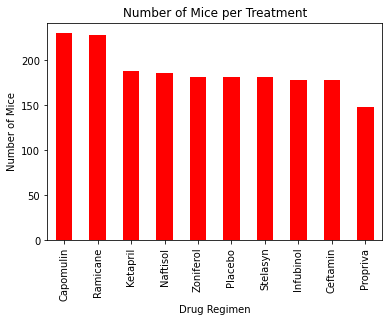

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_treatment = mice_count.plot.bar(color='r')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.show()


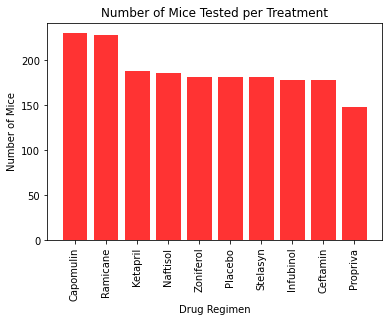

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='r', alpha=0.8, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

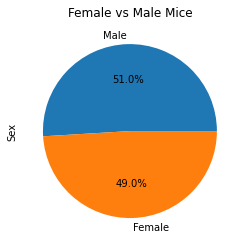

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = clean_df['Sex'].value_counts()
plt.title("Female vs Male Mice")

mouse_gender.plot.pie(autopct= "%1.1f%%")

plt.show()

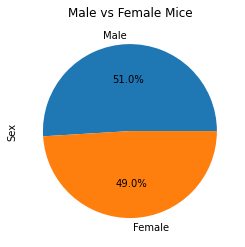

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = mouse_gender.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mice')
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse

# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin, clean_df, on=("Mouse ID","Timepoint"), how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes  
    # add subset 
    # Determine outliers using upper and lower bounds   

In [16]:
#Calculating Capomulin IQR and outliers

Capomulin_tumors = Capomulin_merge['Tumor Volume (mm3)']

cap_quartiles = Capomulin_tumors.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq

print(f"The lower quartile of Capomulin Tumors is: {cap_lowerq}")
print(f"The upper quartile of Capomulin Tumors is: {cap_upperq}")
print(f"The interquartile range of Capomulin Tumors is: {cap_iqr}")
print(f"The the median of Capomulin Tumors is: {cap_quartiles[0.5]} ")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

The lower quartile of Capomulin Tumors is: 32.37735684
The upper quartile of Capomulin Tumors is: 40.1592203
The interquartile range of Capomulin Tumors is: 7.781863460000004
The the median of Capomulin Tumors is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [17]:
# Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane, clean_df, on=("Mouse ID","Timepoint"), how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [18]:
#Calculating Ramicane IQR and outliers

Ramicane_tumors = Ramicane_merge['Tumor Volume (mm3)']

ram_quartiles = Ramicane_tumors.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq

print(f"The lower quartile of Ramicane Tumors is: {ram_lowerq}")
print(f"The upper quartile of Ramicane Tumors is: {ram_upperq}")
print(f"The interquartile range of Ramicane Tumors is: {ram_iqr}")
print(f"The the median of Ramicane Tumors is: {ram_quartiles[0.5]} ")

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

The lower quartile of Ramicane Tumors is: 31.56046955
The upper quartile of Ramicane Tumors is: 40.65900627
The interquartile range of Ramicane Tumors is: 9.098536719999998
The the median of Ramicane Tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [19]:
# Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol, clean_df, on=("Mouse ID","Timepoint"), how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [20]:
#Calculating Capomulin IQR and outliers

Infubinol_tumors = Infubinol_merge['Tumor Volume (mm3)']

inf_quartiles = Infubinol_tumors.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq

print(f"The lower quartile of Infubinol Tumors is: {inf_lowerq}")
print(f"The upper quartile of Infubinol Tumors is: {inf_upperq}")
print(f"The interquartile range of Infubinol Tumors is: {inf_iqr}")
print(f"The the median of Infubinol Tumors is: {inf_quartiles[0.5]} ")

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

The lower quartile of Infubinol Tumors is: 54.04860769
The upper quartile of Infubinol Tumors is: 65.52574285
The interquartile range of Infubinol Tumors is: 11.477135160000003
The the median of Infubinol Tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [21]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin, clean_df, on=("Mouse ID","Timepoint"), how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [22]:
#Calculating Capomulin IQR and outliers

Ceftamin_tumors = Ceftamin_merge['Tumor Volume (mm3)']

cef_quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq - cef_lowerq

print(f"The lower quartile of Ceftamin Tumors is: {cef_lowerq}")
print(f"The upper quartile of Ceftamin Tumors is: {cef_upperq}")
print(f"The interquartile range of Cefamin Tumors is: {cef_iqr}")
print(f"The the median of Ceftamin Tumors is: {cef_quartiles[0.5]} ")

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

The lower quartile of Ceftamin Tumors is: 48.72207785
The upper quartile of Ceftamin Tumors is: 64.29983003
The interquartile range of Cefamin Tumors is: 15.577752179999997
The the median of Ceftamin Tumors is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<function matplotlib.pyplot.show(close=None, block=None)>

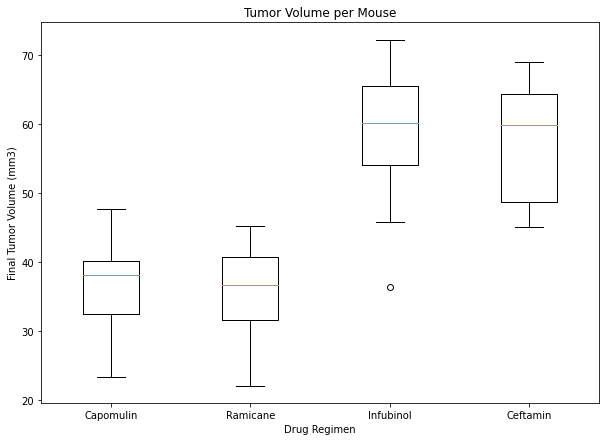

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.set_title('Tumor Volume per Mouse')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(plot_data, labels=Regimen, widths = 0.4, vert=True)
plt.show

## Line and Scatter Plots

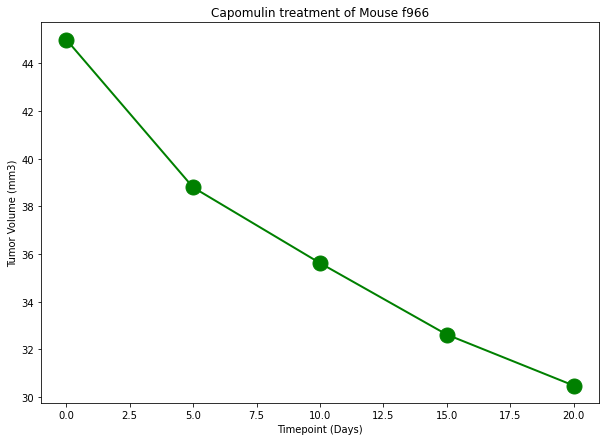

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_plot = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "f966",:]

x_axis = line_plot["Timepoint"]
y_axis = line_plot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.title("Capomulin treatment of Mouse f966")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis,linewidth=2, markersize=15,marker="o",color="green", label="Fahreneit")

In [25]:
line_plot.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


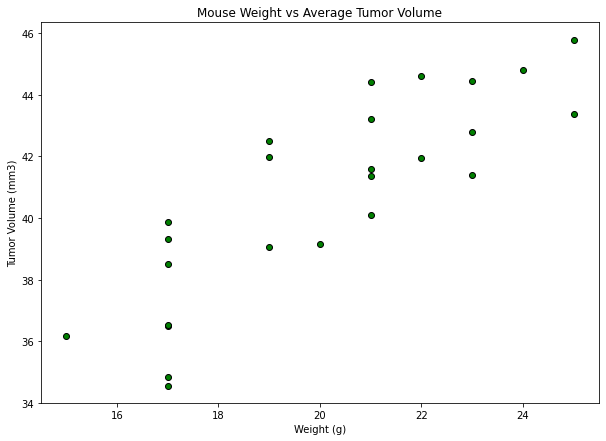

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_cap_vol =Capomulin_df.groupby(['Mouse ID']).mean()
x_axis = avg_cap_vol["Weight (g)"]
y_axis = avg_cap_vol["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black")

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


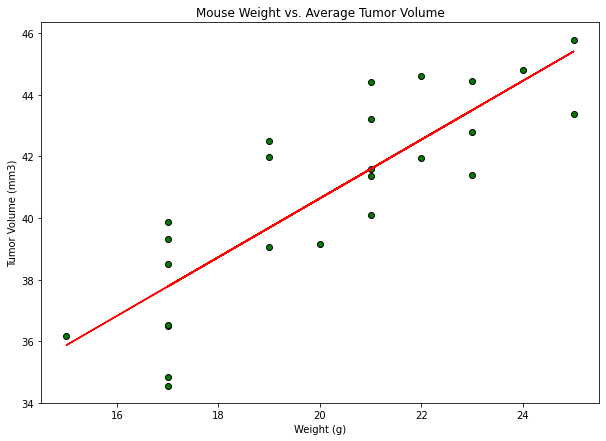

In [28]:
#Linear Regression Model
x_values = avg_cap_vol["Weight (g)"]
y_values = avg_cap_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.show()